In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression


In [4]:
test = pd.read_csv('./test.csv')
test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [5]:
train = pd.read_csv('./train.csv')
train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [6]:
train.isnull().sum()  ## lot_size and lot_size_units have 347 null values so we either drop the nulls or replace them

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [7]:
test.isnull().sum() ## lot_size and lot_size_units have 77 null values so we either drop the nulls or replace them

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [8]:
mask = train.isnull().sum() > 0   ## rows has been narrowed down to the two filds with the nulls
train.isnull().sum()[mask]


lot_size          347
lot_size_units    347
dtype: int64

In [9]:
train.describe()  # we see a summary of the test df

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [10]:
train['lot_size'].mean() ## mean of the lot size

3871.059694427802

In [11]:
train['lot_size'] = train['lot_size'].fillna(3872)  

In [12]:
train.isnull().sum()  ## nulls replaced

beds                0
baths               0
size                0
size_units          0
lot_size            0
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [13]:
train['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [14]:
train.groupby(['lot_size_units','beds']).sum()

baths       size    lot_size  zip_code        price
lot_size_units beds                                                      
acre           1       58.0    37602.0      397.49   5396771   28957450.0
               2      144.0    95977.0      111.49   7457586   58057023.0
               3       89.5    79910.0       42.10   4317949   38074942.0
               4       77.0    74350.0       14.18   2649644   39762400.0
               5       42.5    39909.0        4.19   1177615   17704000.0
               6       23.5    25960.0        1.85    490707   12077718.0
               15       6.0    11010.0        0.33     98112    3700000.0
sqft           1       33.5    24324.0   144501.00   2845385   16343250.0
               2      568.5   416231.0  1223659.00  32772639  295629415.0
               3     1315.0  1028149.0  2331586.00  56814195  548194518.0
               4      985.0   882812.0  1975594.00  36110176  462327587.0
               5      354.5   346996.0   628267.00  10891600  170775525.0
               6       77.5    53140.0    93153.00   1668096   25958900.0
               7       13.5    14466.0    16592.00    294328    6270000.0
               8        8.5     6736.0    12996.00    196251    2505000.0
               9       28.0    18124.0    28911.00    490663    5577400.0
               14       5.0     3884.0     4968.00     98106    1300000.0

In [15]:
train.groupby(['lot_size_units']).sum()

,beds,baths,size,lot_size,zip_code,price
lot_size_units,,,,,,
acre,552,440.5,364718.0,571.63,21588384,1.983335e+08
sqft,4659,3389.0,2794862.0,6460227.00,142181439,1.534882e+09


In [16]:
train['lot_size_units'] = train['lot_size_units'].fillna('sqft')

In [17]:
train.isnull().sum() #Train samples have no nulls

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [18]:
test['lot_size_units'] = test['lot_size_units'].fillna('sqft')

In [19]:
test['lot_size'].mean() ## mean of the lot size

3994.459813084112

In [20]:
test['lot_size'] = test['lot_size'].fillna(3994)

In [21]:
test.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [375]:
## now Both test and train have no nulls  now for step 2 checking the min and max and removing the unwanted fiels, like convarting the arc to sqft

In [22]:
masks = train['lot_size'] < 10
train['lot_size'][masks].count()   # filtering out the lot sizes in arce 

218

In [23]:
multiply = lambda x: x * 43560 if x < 10 else x
train['lot_size'] = train['lot_size'].apply(multiply)   ## convarted arc to sqft

In [24]:
masks = train['lot_size'] < 10
train['lot_size'][masks].count()  

0

In [25]:
masks = test['lot_size'] < 7
test['lot_size'][masks].count()   # filtering out 

59

In [26]:
multiply = lambda x: x * 43560 if x < 7 else x
test['lot_size'] = test['lot_size'].apply(multiply)

In [27]:
masks = test['lot_size'] < 7
test['lot_size'][masks].count()   

0

In [28]:
train['lot_size_units'] = train['lot_size_units'].replace('acre', 'sqft')

In [29]:
test['lot_size_units'] = test['lot_size_units'].replace('acre', 'sqft')

In [30]:
train['lot_size_units'].unique()

array(['sqft'], dtype=object)

In [31]:
test['lot_size_units'].unique()

array(['sqft'], dtype=object)

In [32]:
test.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [33]:
train.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [388]:
## Train and test have no nulls and values are uniq and all in sqft for the lot_size_unit

In [389]:
## Step 3 Identfying outliars 

In [34]:
train['index'] = range(1, len(train)+1)
#test = test.rename(columns={'besds': 'Colum   # Creatig index so we can plot

In [35]:
test['index'] = range(1, len(test)+1)

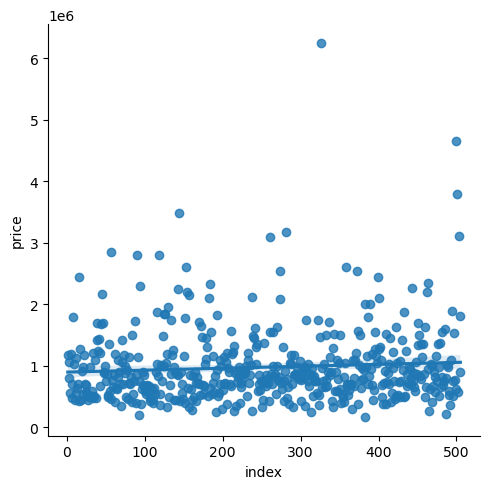

In [36]:
sns.lmplot(data=test, x ='index', y='price')  ## With this plot we can now start identifying Outliars and what to remove and range of price our model will work on

In [37]:
test['beds'].max()

9

In [38]:
test['beds'].min()

1

In [39]:
test['price'].describe()

count    5.050000e+02
mean     9.795822e+05
std      6.084759e+05
min      1.700000e+05
25%      6.199900e+05
50%      8.400000e+05
75%      1.155000e+06
max      6.250000e+06
Name: price, dtype: float64

In [40]:
test['price'].max()

6250000.0

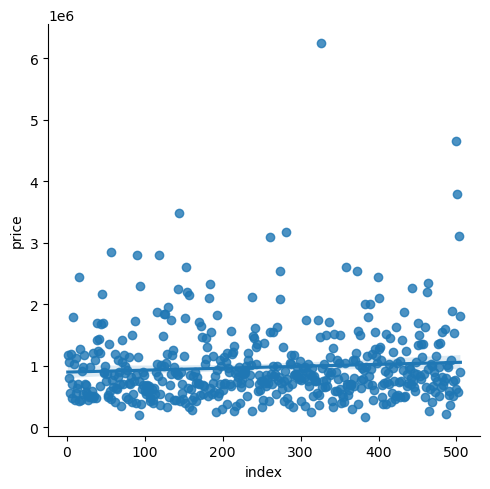

In [41]:
sns.lmplot(data=test, x ='index', y='price') 

In [42]:
test['price'].mean()

979582.1643564356

In [43]:
test['price'].min()

170000.0

In [44]:
test['price'].max()  ## From the graph  we can see the about 300,000 and 2m  so Our samle price will predict houses between 300k and 2m $

6250000.0

In [45]:
out = train['price'] > 2100000

outliars1 = train['price'][out]
outliars1

7       3150000.0
48      2350000.0
61      5495000.0
74      4100000.0
186     3200000.0
          ...    
1934    3350000.0
1945    4000000.0
1960    2650000.0
1979    2895000.0
1998    4815000.0
Name: price, Length: 75, dtype: float64

In [402]:
#out = train['price'] > 2100000

#outliars1 = train['price'][out]
#outliars1

In [46]:
out = train[(train['price'] < 2100000) & (train['price'] > 300000)] 
out


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
4,2,2.0,1042.0,sqft,3872.0,sqft,98102,950000.0,5
...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2012,1,1.0,889.0,sqft,3872.0,sqft,98121,550000.0,2013
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014
2014,2,2.0,795.0,sqft,3872.0,sqft,98103,590000.0,2015


In [47]:
train = out

train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
4,2,2.0,1042.0,sqft,3872.0,sqft,98102,950000.0,5
...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2012,1,1.0,889.0,sqft,3872.0,sqft,98121,550000.0,2013
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014
2014,2,2.0,795.0,sqft,3872.0,sqft,98103,590000.0,2015


In [48]:
train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
4,2,2.0,1042.0,sqft,3872.0,sqft,98102,950000.0,5
...,...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2012,1,1.0,889.0,sqft,3872.0,sqft,98121,550000.0,2013
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014
2014,2,2.0,795.0,sqft,3872.0,sqft,98103,590000.0,2015


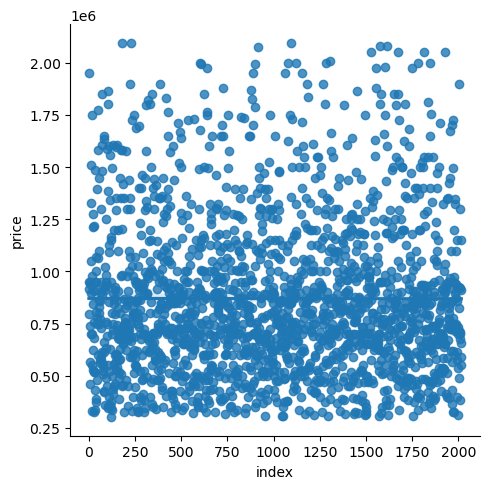

In [49]:
sns.lmplot(data=train, x ='index', y='price') 

In [50]:
out2 = test[(train['price'] < 2100000) & (test['price'] > 300000)] 
out2


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,2
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,3
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
...,...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0,501
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,502
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,503
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0,504


In [51]:
test = out2
test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0,2
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0,3
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
...,...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0,501
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,502
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,503
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0,504


In [409]:
# Outliars for beds and bath

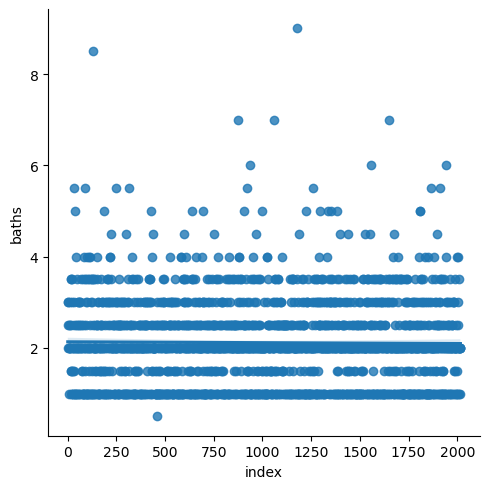

In [52]:
sns.lmplot(data=train, x ='index', y='baths') 

In [411]:
# bath numbers between 2 and 4 

In [53]:
bathout = train[(train['baths'] < 4) & (train['baths'] > 1.5)] 
bathout

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
4,2,2.0,1042.0,sqft,3872.0,sqft,98102,950000.0,5
...,...,...,...,...,...,...,...,...,...
2010,2,2.0,1400.0,sqft,14810.4,sqft,98199,699950.0,2011
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014
2014,2,2.0,795.0,sqft,3872.0,sqft,98103,590000.0,2015


In [54]:
train = bathout
train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
4,2,2.0,1042.0,sqft,3872.0,sqft,98102,950000.0,5
...,...,...,...,...,...,...,...,...,...
2010,2,2.0,1400.0,sqft,14810.4,sqft,98199,699950.0,2011
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014
2014,2,2.0,795.0,sqft,3872.0,sqft,98103,590000.0,2015


In [55]:
bathout2 = test[(test['baths'] < 4) & (test['baths'] > 1.5)] 
bathout2

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
5,2,2.0,963.0,sqft,4753.0,sqft,98122,701000.0,6
8,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,9
...,...,...,...,...,...,...,...,...,...
497,2,2.5,1250.0,sqft,1000.0,sqft,98107,770000.0,498
498,5,3.5,5420.0,sqft,15681.6,sqft,98112,4655625.0,499
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,502
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,503


In [56]:
test = bathout2
test

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
5,2,2.0,963.0,sqft,4753.0,sqft,98122,701000.0,6
8,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,9
...,...,...,...,...,...,...,...,...,...
497,2,2.5,1250.0,sqft,1000.0,sqft,98107,770000.0,498
498,5,3.5,5420.0,sqft,15681.6,sqft,98112,4655625.0,499
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,502
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,503


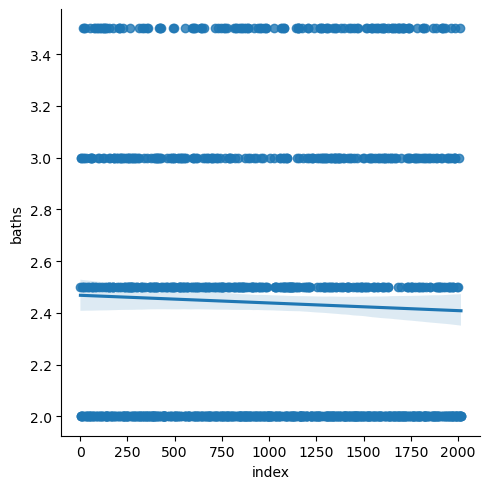

In [57]:
sns.lmplot(data=train, x ='index', y='baths') 

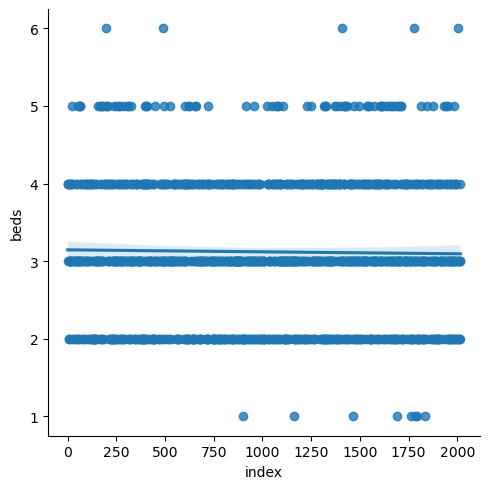

In [58]:
sns.lmplot(data=train, x ='index', y='beds') 

In [59]:
bedsout2 = test[(test['beds'] < 5) & (test['beds'] > 2)] 
bedsout2

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
3,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
8,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,9
10,3,2.5,1760.0,sqft,3630.0,sqft,98122,1135000.0,11
...,...,...,...,...,...,...,...,...,...
493,4,2.5,2880.0,sqft,6210.0,sqft,98115,1900000.0,494
496,3,2.5,2275.0,sqft,3606.0,sqft,98122,1528000.0,497
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0,502
502,3,2.5,2950.0,sqft,20473.2,sqft,98118,3105000.0,503


In [60]:
test = bedsout2
test.shape

(206, 9)

In [61]:
bedsout1 = train[(train['beds'] < 5) & (train['beds'] > 2)] 
bedsout1

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,1
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,2
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,3
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,4
8,3,2.5,1520.0,sqft,741.0,sqft,98108,565000.0,9
...,...,...,...,...,...,...,...,...,...
2008,3,2.0,1482.0,sqft,1085.0,sqft,98117,919000.0,2009
2009,3,3.5,1680.0,sqft,1486.0,sqft,98126,675000.0,2010
2011,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014


In [62]:
train = bedsout1
train.shape

(811, 9)

In [63]:
train.shape

(811, 9)

In [64]:
test.shape

(206, 9)

In [424]:
### concaing the datafranms to make it easier to split into X and y 

In [65]:
merged_df = pd.concat([test, train], ignore_index=True)
merged_df


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
1,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
2,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
3,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,9
4,3,2.5,1760.0,sqft,3630.0,sqft,98122,1135000.0,11
...,...,...,...,...,...,...,...,...,...
1012,3,2.0,1482.0,sqft,1085.0,sqft,98117,919000.0,2009
1013,3,3.5,1680.0,sqft,1486.0,sqft,98126,675000.0,2010
1014,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
1015,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014


In [426]:
## Split data into (test and train with Dependet and Independent Vaiiables)

In [427]:
## ONE HOT ENCODING 

In [66]:
merged_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,index
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0,1
1,3,2.0,2360.0,sqft,12196.8,sqft,98188,565000.0,4
2,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0,5
3,4,2.0,2060.0,sqft,4206.0,sqft,98144,1025000.0,9
4,3,2.5,1760.0,sqft,3630.0,sqft,98122,1135000.0,11
...,...,...,...,...,...,...,...,...,...
1012,3,2.0,1482.0,sqft,1085.0,sqft,98117,919000.0,2009
1013,3,3.5,1680.0,sqft,1486.0,sqft,98126,675000.0,2010
1014,3,2.0,1370.0,sqft,21780.0,sqft,98112,910000.0,2012
1015,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0,2014


In [69]:
merged_df.to_csv('cl_merged.csv', index=False)

In [67]:
## ONE HOT ENCODING 

#merged_df2 = pd.get_dummies(merged_df, columns=['size_units','lot_size_units'], drop_first=True) drops col
## prevents multi colinerrity for multiple values

merged_df2 = pd.get_dummies(merged_df, columns=['size_units','lot_size_units'])
merged_df2.head()

,beds,baths,size,lot_size,zip_code,price,index,size_units_sqft,lot_size_units_sqft
0,3,3.0,2850.0,4200.0,98119,1175000.0,1,1,1
1,3,2.0,2360.0,12196.8,98188,565000.0,4,1,1
2,3,3.5,1942.0,1603.0,98107,1187000.0,5,1,1
3,4,2.0,2060.0,4206.0,98144,1025000.0,9,1,1
4,3,2.5,1760.0,3630.0,98122,1135000.0,11,1,1


In [429]:
unseen = merged_df2.sample(frac=0.10 )
merged_df2 = merged_df2[~merged_df2.index.isin(unseen.index)]

print(f'set-aside:{len(unseen)} \ndf : {len(merged_df2)}')

set-aside:102 
df : 915


In [430]:
### Scale Data mainly for logistic regression ?? and standadize ??

In [431]:
## Assignung the X and Y variables

X = np.array(merged_df2.drop(['price'], axis=1))
y= np.array(merged_df2['price'])

type(X)
type(y)


numpy.ndarray

In [432]:
X.shape

(915, 8)

In [433]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,3.0,3.0,2850.0,4200.0,98119.0,1.0,1.0,1.0
1,3.0,2.0,2360.0,12196.8,98188.0,4.0,1.0,1.0
2,3.0,3.5,1942.0,1603.0,98107.0,5.0,1.0,1.0
3,4.0,2.0,2060.0,4206.0,98144.0,9.0,1.0,1.0
4,3.0,2.5,1760.0,3630.0,98122.0,11.0,1.0,1.0


In [434]:
y.shape

(915,)

In [435]:
pd.DataFrame(y).head()

,0
0,1175000.0
1,565000.0
2,1187000.0
3,1025000.0
4,1135000.0


In [436]:
# Split Data into (Train and Test ready for Model)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [438]:
X[0]

array([3.0000e+00, 3.0000e+00, 2.8500e+03, 4.2000e+03, 9.8119e+04,
       1.0000e+00, 1.0000e+00, 1.0000e+00])

In [439]:
y[0]

1175000.0

In [440]:
model = LinearRegression()


In [441]:
model.fit(X_train, y_train) # we fir here so we can now use the model on test and train

LinearRegression()

In [442]:
## Establish Intercept
print(model.intercept_)

144514108.2861766


In [443]:
## Establish Coefitient
print(model.coef_)

[-4.67847519e+03  9.88273896e+04  4.22826775e+02 -1.32015158e+00
 -1.47308591e+03 -4.48878279e-01  0.00000000e+00  0.00000000e+00]


In [444]:
mae_train = mean_absolute_error(y_train, model.predict(X_train))

print('MAE_train: ', mae_train)

MAE_train:  203690.4002059404


In [445]:
## Analysig the residuals and looknh for the true diference

In [446]:
mae_df = pd.DataFrame({'Actual-Price' : y_train, 'Predict-Price' : model.predict(X_train)})
mae_df['Diff'] = mae_df['Actual-Price'] - mae_df['Predict-Price']
mae_df.sort_values('Diff')


,Actual-Price,Predict-Price,Diff
450,750000.0,1.654588e+06,-9.045879e+05
345,489000.0,1.378702e+06,-8.897022e+05
444,650000.0,1.422313e+06,-7.723131e+05
187,520000.0,1.228841e+06,-7.088407e+05
685,1250000.0,1.909674e+06,-6.596744e+05
...,...,...,...
539,2334500.0,1.434413e+06,9.000866e+05
534,2080000.0,1.120670e+06,9.593299e+05
640,2095000.0,1.046816e+06,1.048184e+06
590,3480000.0,1.903798e+06,1.576202e+06


In [447]:
mae_df['Diff'].max()

1629154.2687611282

In [448]:
mae_df['Diff'].min()

-904587.8502888381

In [449]:
## Analysig the residuals and looknh for the true diference

In [450]:
mae_df = pd.DataFrame({'Actual-Price' : y_train, 'Predict-Price' : model.predict(X_train)})
mae_df['Diff'] = abs(mae_df['Actual-Price'] - mae_df['Predict-Price'])
mae_df.sort_values('Diff')


,Actual-Price,Predict-Price,Diff
262,729950.0,7.293156e+05,6.343965e+02
630,995000.0,9.961618e+05,1.161758e+03
488,1025000.0,1.023816e+06,1.183579e+03
632,1027000.0,1.025761e+06,1.239046e+03
363,1345000.0,1.346285e+06,1.285056e+03
...,...,...,...
450,750000.0,1.654588e+06,9.045879e+05
534,2080000.0,1.120670e+06,9.593299e+05
640,2095000.0,1.046816e+06,1.048184e+06
590,3480000.0,1.903798e+06,1.576202e+06


In [451]:
mae_df['Diff'].mean()

203690.4002059404

In [452]:
R_SQ_test = r2_score(y_test, model.predict(X_test))

In [453]:
R_SQ_train = r2_score(y_train, model.predict(X_train))

In [355]:
print(f'R_SQ_tRAIN: {R_SQ_train} AND R_SQ_test: {R_SQ_test}')

R_SQ_tRAIN: 0.469559044824316 AND R_SQ_test: 0.421247101180958


In [454]:
vMAE = mean_absolute_error(y_test , model.predict(X_test))
vMSE = mean_squared_error(y_test,model.predict(X_test))


MAE = mean_absolute_error(y_test, model.predict(X_test))
MSE = mean_squared_error(y_test,model.predict(X_test))

rmse = np.sqrt(MSE)

##https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

R_SQ = r2_score(y_test, model.predict(X_test))
print(f'MAE: {MAE} \nMSE: {MSE} \ nRMSE: { rmse}\nR_SQ: {R_SQ}')

MAE: 214043.99977081534 
MSE: 83200047675.39023 \ nRMSE: 288444.1846794458
R_SQ: 0.4157638897221346


In [341]:
## sns.barplot(x=)

In [455]:
unseen_y = np.array(unseen['price'])
unseen_X = np.array(unseen.drop('price', axis=1))

In [456]:
unseen_y.shape

(102,)

In [458]:
pred_y = model.predict(unseen_X)  ## predicting the price based on the input house data

In [459]:
unseen_R2 = r2_score(unseen_y, pred_y)
unseen_R2

0.411853172112454

In [346]:
## Coparison on unseen data

In [460]:
unseen_df= pd.DataFrame({'Actual': unseen_y
              ,' Predicted': pred_y })
unseen_df

,Actual,Predicted
0,1108000.0,1.246641e+06
1,1850000.0,1.155966e+06
2,1600000.0,1.540017e+06
3,750000.0,7.044431e+05
4,780000.0,7.681816e+05
...,...,...
97,1290000.0,1.261513e+06
98,1299950.0,1.100452e+06
99,1160000.0,9.087989e+05
100,1712000.0,1.573062e+06


In [461]:
MAE_unseen = mean_absolute_error(unseen_y, model.predict(unseen_X))  
MAE_unseen

208579.797949599

In [462]:
print('MAE IS ', MAE_unseen, 'and UNSEEN R2 :', unseen_R2)

MAE IS  208579.797949599 and UNSEEN R2 : 0.411853172112454


In [243]:
print(f'mae_Unseen: {MAE_unseen}  mae_test: {mae_test}  mae_train: { mae_train}')

mae_Unseen: 217673.90212208588  mae_test: 225907.20825945016  mae_train: 197107.24011225355


225907.20825945016